In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

In [2]:
df =  pd.read_csv('anscombe.csv')
df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [3]:
df.describe()

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


In [4]:
meanxs = []
meanys = []
varxs = []
varys = []
corrs = []
lines = []
r2s = []

for i in range(1,5):
    mean_x=df[f'x{i}'].mean()
    mean_y=df[f'y{i}'].mean()
    var_x=df[f'x{i}'].var()
    var_y=df[f'y{i}'].var()
    
    corr= df[[f'x{i}',f'y{i}']].corr().iloc[0,1]
    lr = LinearRegression()
    lr.fit(df[f'x{i}'].values.reshape(-1,1),df[f'y{i}'])
    intercept = lr.intercept_
    coeff = lr.coef_[0]
    r2 = r2_score(df[f'y{i}'],lr.predict(df[f'x{i}'].values.reshape(-1,1)))
    
    meanxs.append(mean_x)
    meanys.append(round(mean_y,2))
    varxs.append(var_x)
    varys.append(var_y)
    corrs.append(corr)
    lines.append(f'y = {intercept:.2f}+{coeff:.2f}*x')
    r2s.append(r2)
    
    print(f'Mean of x{i} is {mean_x:.4f}')
    print(f'Mean of y{i} is {mean_y:.4f}')
    print(f'Variance of x{i} is {var_x:.4f}')
    print(f'Variance of y{i} is {var_y:.4f}')
    print(f'Correlation between x{i} and y{i} is {corr:.3f}')
    print(f'Intercept: {intercept:.2f}, coefficient:{coeff:.2f}')
    print(f'R-squared score: {r2:.3f}')
    
    print('\n\n\n')


Mean of x1 is 9.0000
Mean of y1 is 7.5009
Variance of x1 is 11.0000
Variance of y1 is 4.1273
Correlation between x1 and y1 is 0.816
Intercept: 3.00, coefficient:0.50
R-squared score: 0.667




Mean of x2 is 9.0000
Mean of y2 is 7.5009
Variance of x2 is 11.0000
Variance of y2 is 4.1276
Correlation between x2 and y2 is 0.816
Intercept: 3.00, coefficient:0.50
R-squared score: 0.666




Mean of x3 is 9.0000
Mean of y3 is 7.5000
Variance of x3 is 11.0000
Variance of y3 is 4.1226
Correlation between x3 and y3 is 0.816
Intercept: 3.00, coefficient:0.50
R-squared score: 0.666




Mean of x4 is 9.0000
Mean of y4 is 7.5009
Variance of x4 is 11.0000
Variance of y4 is 4.1232
Correlation between x4 and y4 is 0.817
Intercept: 3.00, coefficient:0.50
R-squared score: 0.667






In [5]:
anscombe_df = pd.DataFrame({'Mean of x':meanxs,'Mean of y':meanys,
                           'Variance of x':varxs,'Variance of x':varxs,
                           'Correlation between x and y':corrs,
                           'Linear Regression line':lines,
                           'R-squared value of linear regression':r2s}, index=[1,2,3,4])
anscombe_df

,Mean of x,Mean of y,Variance of x,Correlation between x and y,Linear Regression line,R-squared value of linear regression
1,9.0,7.5,11.0,0.816421,y = 3.00+0.50*x,0.666542
2,9.0,7.5,11.0,0.816237,y = 3.00+0.50*x,0.666242
3,9.0,7.5,11.0,0.816287,y = 3.00+0.50*x,0.666324
4,9.0,7.5,11.0,0.816521,y = 3.00+0.50*x,0.666707


<AxesSubplot:xlabel='x4', ylabel='y4'>

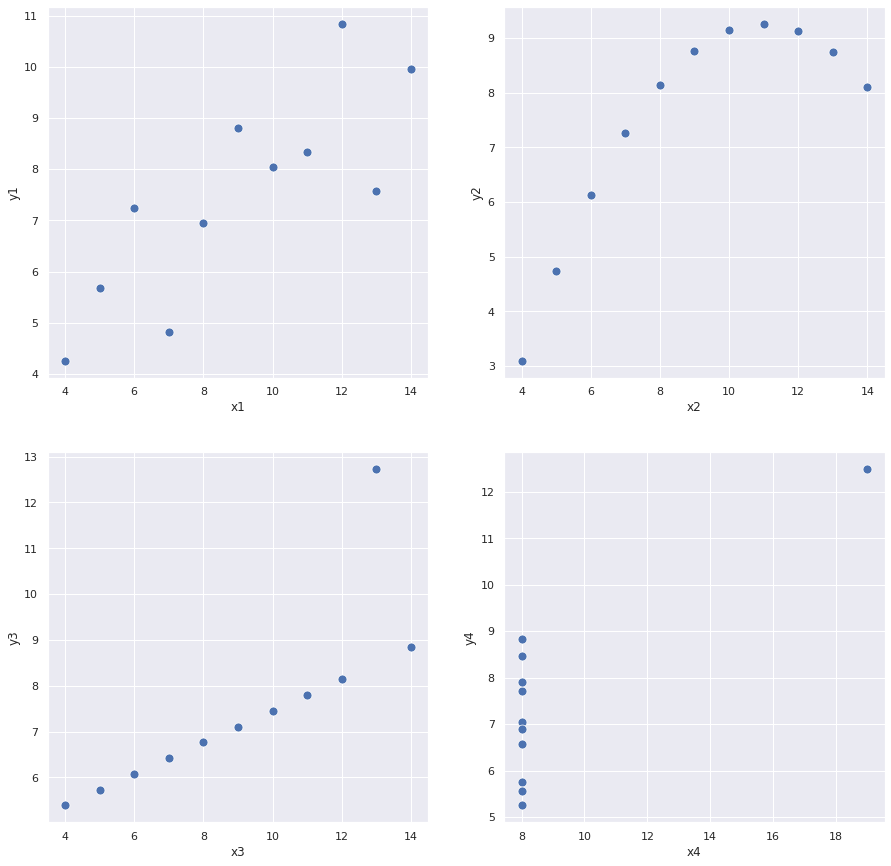

In [6]:

plt.subplot(2,2,1)
sns.scatterplot(data=df, x=f'x1', y=f'y1',s=80)

plt.subplot(2,2,2)
sns.scatterplot(data=df, x=f'x2', y=f'y2',s=80)

plt.subplot(2,2,3)
sns.scatterplot(data=df, x=f'x3', y=f'y3',s=80)

plt.subplot(2,2,4)
sns.scatterplot(data=df, x=f'x4', y=f'y4',s=80)
